## Visualizing results -  Original Geoparser - Fifth Edition

We have run the [Edinburgh geoparser](https://programminghistorian.org/en/lessons/geoparsing-text-with-edinburgh#patch-fix) to extract and resolvoe locations contained within **Suplements of 4th, 5th,6th Editions  of the Encyclopaedia Britannica**. 
                             
The query for running that we have used is the following: 

`spark-submit --py-files defoe.zip defoe/run_query.py nls_4_5_6_suplement.txt nls defoe.nls.queries.geoparser_pages -r geoparser_original_EB_4_5_6_suplement -n 16`



### Loading the necessary libraries

In [1]:
import yaml
from IPython.core.display import display, HTML
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

### Functions

In [2]:
def read_query_results(filename):
    with open('./results_NLS/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [3]:
def geresolution_dataframe(result):
    dfs=[]
    data=[]
    c_locs=[]
    for i in result.keys():
        t_ind = 0
        e_ind = 0
        for k in result[i]:
            locs= k["georesolution_page"]
            page = k["text_unit id"]
       
            if locs != {}:
                data=[]
                l_ind = 0
                for i in locs:
                    if type(locs[i]) == type([]) :
                        c_locs=locs[i].copy()
                        c_locs.append(i.split("-")[0])
                        c_locs.append(page)
                        data.append(c_locs)
                        l_ind = l_ind + 1   
                e_ind = t_ind + l_ind 
                if data:
                    df_page = pd.DataFrame(data, columns = ['Latitude', 'Longitude', 'Place', 'Page'], 
                                      index=list(range(t_ind, e_ind)))
                    dfs.append(df_page)
                    t_ind=e_ind
    df_total = pd.concat(dfs)
    return df_total

In [4]:
def get_place(df, lat, long):
    df_new=df.loc[(df['Latitude'] == lat) & (df_total['Longitude'] == long)]['Place']
    return df_new.count(), df_new.iloc[0]

In [5]:
def label_freq_places(df_total, df_max_geolocations, filter_list):
    place_label=[]
    place_freq = []
    i_limit = 15
    i =0
    k =0 
    while k < i_limit:
        place_count, place_name = get_place(df_total, df_max_geolocations.iloc[i]['Latitude'], df_max_geolocations.iloc[i]['Longitude'])
        if place_name not in filter_list:
            print(i, place_count,place_name)
            if place_name not in place_label:
                k = k + 1
            place_label.append(place_name)
            place_freq.append(place_count)
         
        i = i + 1
    return place_label, place_freq

In [6]:
def plot_bar_places(df_group_places):
    # this is for plotting purpose
    index = np.arange(len(df_group_places['place_label']))
    plt.bar(index, df_group_places['count'], color='orange')
    plt.xlabel('Places')
    plt.ylabel('Frequency of Places')
    plt.xticks(index, df_group_places['place_label'], rotation=40, fontsize=8)
    plt.title('15 Places most mentioned in the using the Original Geoparser')

### Information about the defoe geoparser query

This query does the following tasks:

- Ingests all the pages indicated in the query
- Cleans the text applied two fixes: Long-s and hyphen words
- Identifies *entities* using the original geotagging of the Edinburgh geoparser. 
- From the previous entities, just selects the one about *location* and creates an xml (in memory) per page with these "location" entities. 
- Applies the georesolve of the Edinburgh geoparser to each xml and gets lat and long. **Important: Everything is in memory, we do not create XML files in those steps**
- Group the results by Book's title, and also gets some informative metadata

As a result we get a file per book with an entry per page with the following information:

    * edition: Edition of the gazetteer
    * georesolution_page: Page's geolocations after applying the georesolver
    * page_filename: Page's filename (page's relative path)
    * text_unit id: The number of this page (e.g. Page 1)
    * lang_model : The language model applied (original_geoparser)
    * type_distribution: type of document (newspaper|book). In this case is "book". 
    * year: Publication year 


In [7]:
results=read_query_results('geoparser_original_EB_4_5_6_suplement')

In [8]:
df_total= geresolution_dataframe(results)

In [9]:
df_total[["Place"]].count()

Place    151500
dtype: int64

In [10]:
df_total["Place"]= df_total["Place"].str.capitalize()

In [11]:
df_total.groupby("Place").count()

,Latitude,Longitude,Page
Place,,,
A. division,15,15,15
Aachen,8,8,8
Aalborg,3,3,3
Aalen,2,2,2
Aamara,2,2,2
Aar,1,1,1
Aarau,2,2,2
Aare,6,6,6
Abal,1,1,1


In [12]:
df_filter = df_total[['Latitude','Longitude']].groupby(['Latitude', 'Longitude'])['Longitude'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)   

df_max_geolocations = df_filter.drop(0)

df_max_geolocations.head(15)


,Latitude,Longitude,count
16587,54,-4,1434
5853,38.7937266,-77.8577722,1029
4290,34.6120507,-82.765139,904
10565,45.2535999,-86.9795592,853
12577,49.012779,2.55,812
17435,56,-4,777
15125,52.16045,-0.70312,766
5924,38.8873341,-77.05553279999999,717
13404,50.6391735835358,3.07591438293457,711
15127,52.1615076059046,-0.703125,607


In [13]:
#Getting the 15 places (and their frequencies) most mentioned
filter_list=['Jupiter', 'Venus, a d p', 'Saturn', 'Avas']
place_label, place_freq = label_freq_places(df_total, df_max_geolocations, filter_list)
    

0 1434 Great britain
1 1029 England
2 904 France
3 853 Europe
4 812 Paris
5 777 Scotland
6 766 England
7 717 Scotland
8 711 Europe
9 607 Great britain
10 583 France
11 576 Paris
12 574 France
13 562 England
14 521 London
15 493 England
16 473 Edinburgh
17 419 Paris
18 402 England
19 402 Leibnitz
20 397 Glasgow
21 379 Ireland
22 371 Royal society
23 366 London
24 360 United states
25 359 Spain
26 350 London
27 350 America


In [14]:
#Visualizing the 15 places in a Bar plot
df_places = {'place_label':place_label,'place_freq':place_freq}
df_places_freq = pd.DataFrame(df_places)
df_group_places = df_places_freq.groupby(['place_label'])['place_freq'].sum()\
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)   


df_group_places

,place_label,count
2,England,3252
4,France,2061
6,Great britain,2041
10,Paris,1807
3,Europe,1564
12,Scotland,1494
9,London,1237
1,Edinburgh,473
8,Leibnitz,402
5,Glasgow,397


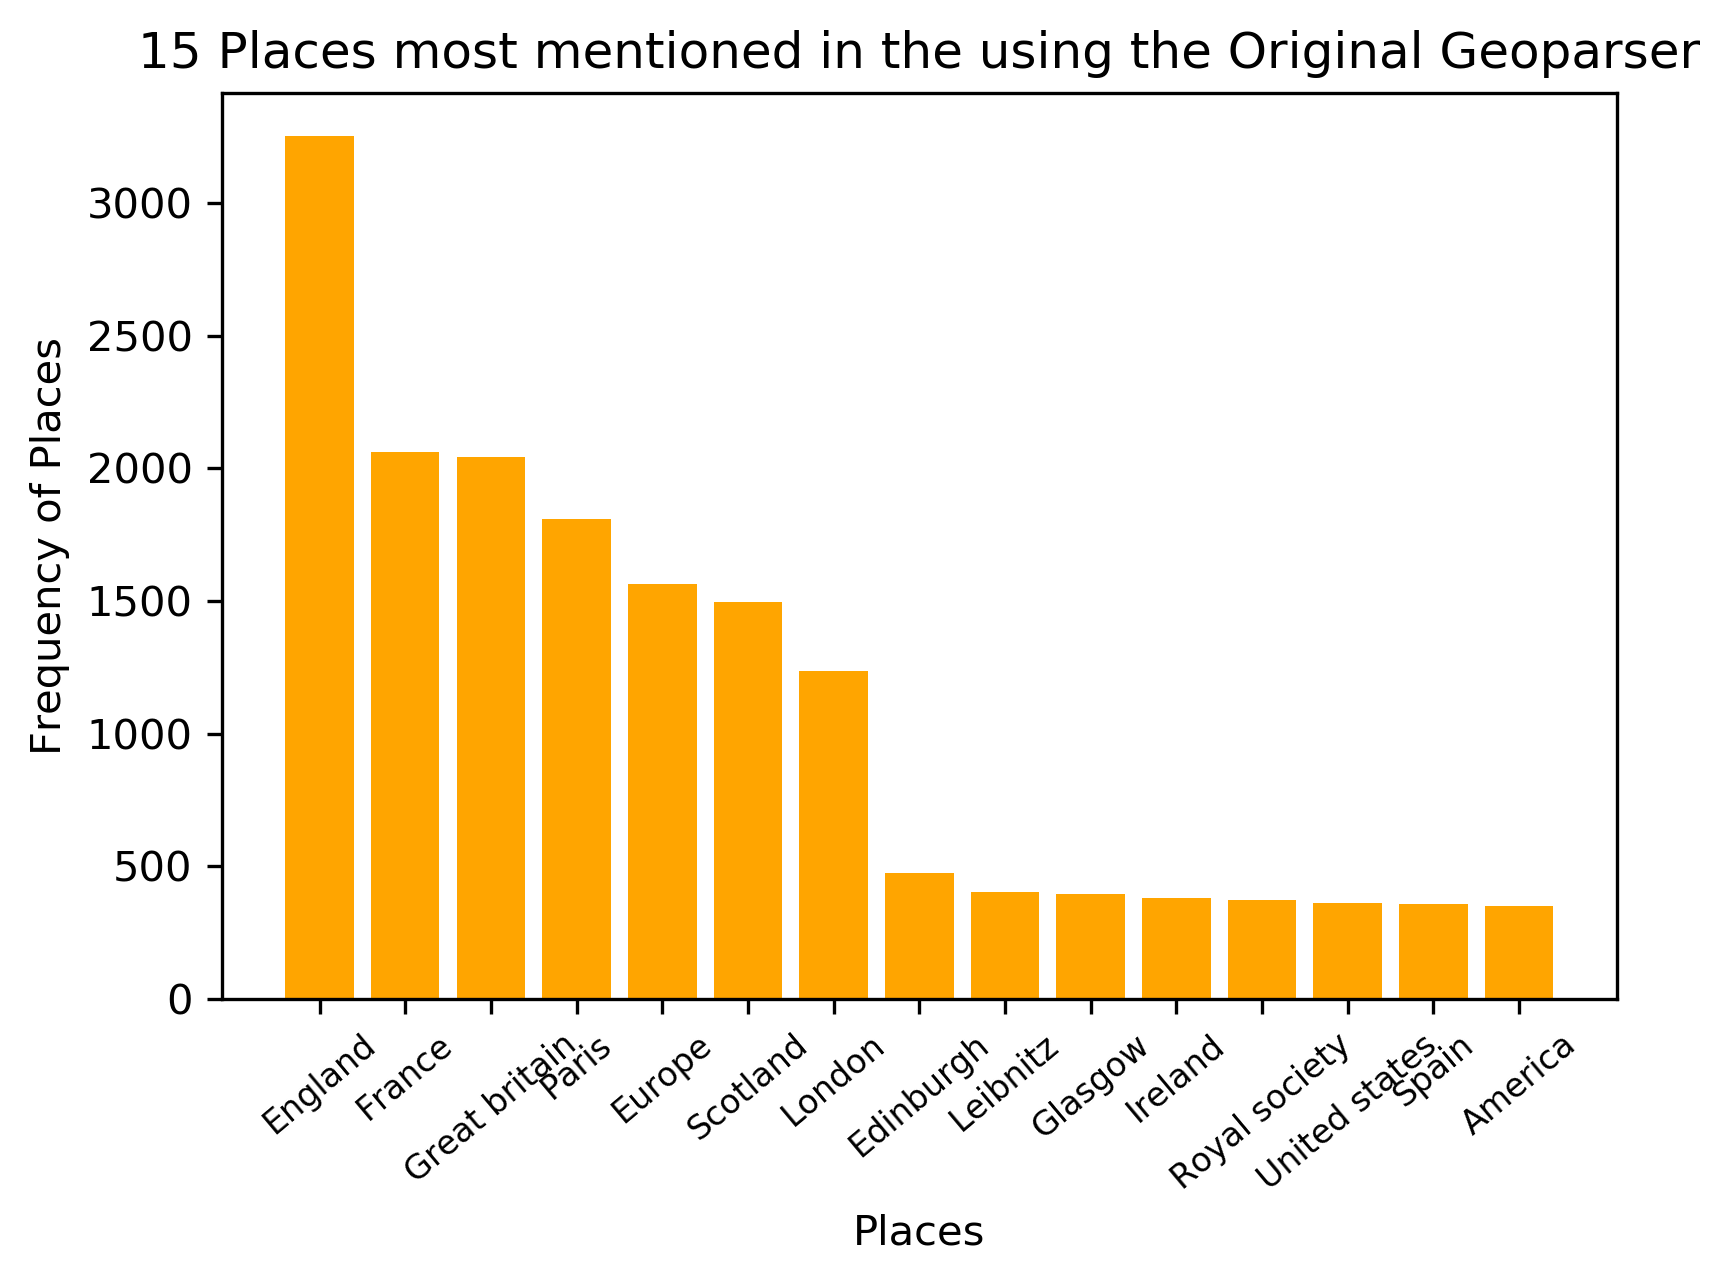

In [15]:
mpl.rcParams['figure.dpi']=300
plot_bar_places(df_group_places)